In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import unidecode


# Datos

Fueron extraidos a partir de un trabajo de web scrapin realizado por 2 estudiantes de la UdeA, 
Este es el repositorio de donde se extrajo:

https://github.com/andres-soto-h/monografia-udea-eacd

In [38]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

## importacion de los datos

In [39]:
# dfdata por dfpropiedades
# dfubi por dfubicacion

In [40]:
dfpropiedades=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\consolidado_propiedades_FR_30052021.csv', delimiter=';', encoding='latin1')
dfubicacion=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\davipola.csv')

# Inspeccion de los datos

## Vista general

In [41]:
dfpropiedades.head(2)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,Balcón,...,En zona Comercial,Finca cafetera,Servicio de Lavandería,Altura restringida,Ascensor(es) inteligente(s),Lote Vacio,Control de Acústica,Control térmico,Panorámica 360º,Con cerca eléctrica
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Usada,https://www.fincaraiz.com.co/finca-en-venta/el...,Finca en Venta El Retiro Arcadia,$ 2.900.000.000,"1,00 Ha",4,5,Sin especificar,propiedad con casa principal de 4 habitaciones...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
dfpropiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Columns: 188 entries, tipo to Con cerca eléctrica
dtypes: float64(174), object(14)
memory usage: 3.9+ MB


In [43]:
dfpropiedades.shape

(2715, 188)

In [44]:
dfpropiedades.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'Balcón',
       ...
       'En zona Comercial', 'Finca cafetera', 'Servicio de Lavandería',
       'Altura restringida', 'Ascensor(es) inteligente(s)', 'Lote Vacio',
       'Control de Acústica', 'Control térmico', 'Panorámica 360º',
       'Con cerca eléctrica'],
      dtype='object', length=188)

In [45]:
dfubicacion.head(2)

,Código Departamento,Código Municipio,Nombre Departamento,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada
0,05,5001.0,ANTIOQUIA,MEDELLÍN,Municipio
1,05,5002.0,ANTIOQUIA,ABEJORRAL,Municipio


In [46]:
dfubicacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Código Departamento                              1126 non-null   object 
 1   Código Municipio                                 1121 non-null   float64
 2   Nombre Departamento                              1121 non-null   object 
 3   Nombre Municipio                                 1121 non-null   object 
 4   Tipo: Municipio / Isla / Área no municipalizada  1121 non-null   object 
dtypes: float64(1), object(4)
memory usage: 44.1+ KB


In [47]:
dfubicacion.shape

(1126, 5)

In [48]:
dfubicacion.columns

Index(['Código Departamento', 'Código Municipio', 'Nombre Departamento',
       'Nombre Municipio', 'Tipo: Municipio / Isla / Área no municipalizada'],
      dtype='object')

## Deteccion de datos faltantes

In [49]:
def graf_num_nan(df):
        '''
        Esta funcion no muestra un analisis general de la cantidad de datos faltantes que tiene cada columna
        representada en un grafico de barras. Organizando las variables de manera ascendente por numero de valores faltantes
        df : dataframe a analizar
        '''

        dfNan = df.isnull().pipe( # ejecutar varias operaciones en el DataFrame, "pipe" que se encarga de pasar la salida de una función como entrada de la siguiente
                lambda df: (
                            df.sum() # Suma el número de valores faltantes en cada columna del DataFrame
                            .reset_index(name="numero_Nan") # Reinicia el índice del DataFrame resultante y se le asigna nombre
                            .rename(columns={'index':'variable'}) # se cambia el nombre de index a variable
                            .assign ( # agrega columnas al df
                                    observaciones = len(df), # numero total de registros en el df original
                                    pct_missing = lambda df1 : df1.numero_Nan / df1.observaciones * 100, # porcentaje Nan en cada variable
                                    )
                            )

                    )
        plt.figure(figsize=(20,7))
        dfgnan = dfNan.sort_values('numero_Nan') # almacenar el resumen del nan de las variables en el df dfgnan
        plot_range = range(1, len(dfgnan.index) + 1) # establece la posicion de cada variable en el grafico
        plt.hlines(y=plot_range, xmin=0, xmax=dfgnan.numero_Nan, colors='gray') # traza lineas horizontales en el grafico
        plt.plot(dfgnan.numero_Nan, plot_range, "o", color='black') # pone "o" en el eje x
        # plt.yticks(plot_range, dfgnan.variable) #  etiquetar los puntos en el eje y con los nombres de las variables
        plt.grid(axis="y") # agregar un gráfico de cuadrícula en el eje y
        plt.xlabel("numero de Nan")
        plt.ylabel("Variable en orden ascendente en razon al numero de Nan")

        return dfNan

In [50]:
# numero de datos faltantes en general en cada dataframe
print(f'Datos faltantes en el dataframe dfpropiedades {dfpropiedades.isna().sum().sum()}')
print(f'Datos faltantes en el dataframe dfubicacion {dfubicacion.isna().sum().sum()}')

Datos faltantes en el dataframe dfpropiedades 431423
Datos faltantes en el dataframe dfubicacion 20


Debido a que dfubicacion no representa gran cantidad de datos faltantes, nos centraremos en analizar el dataframe dfpropiedades

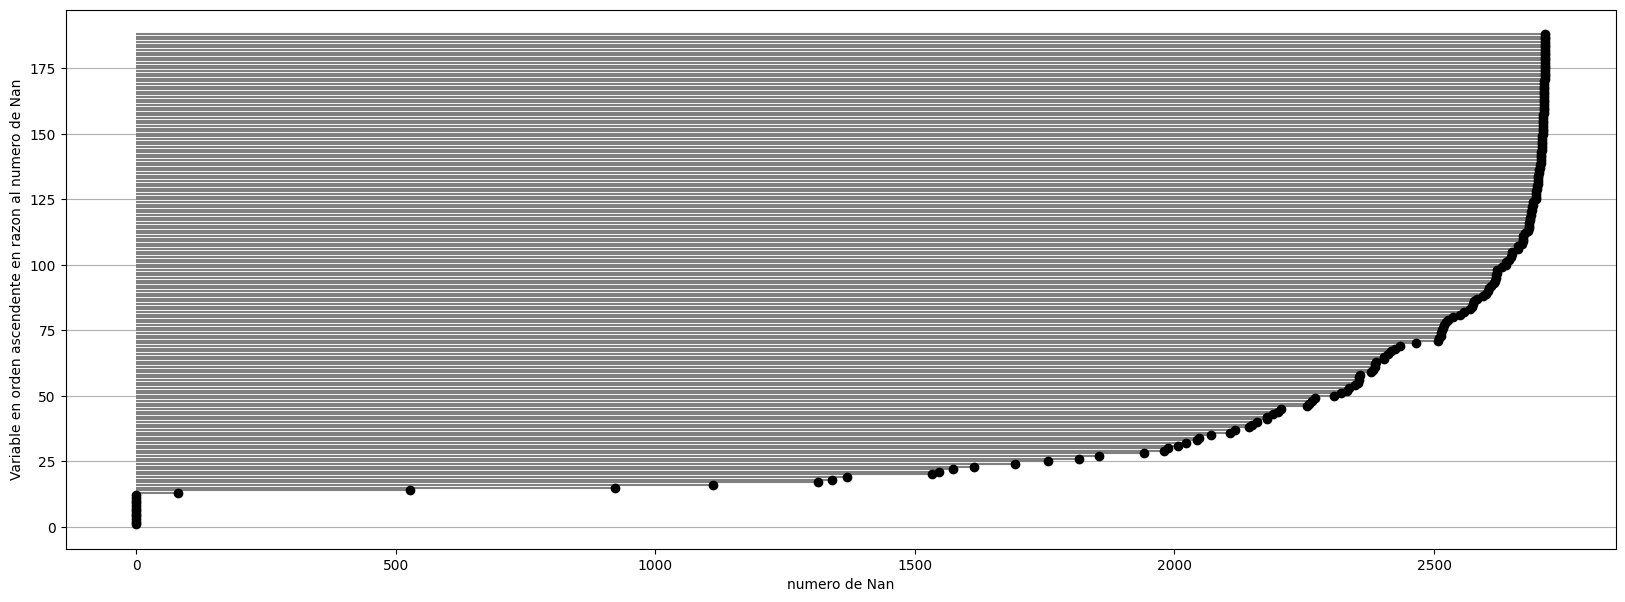

In [51]:
# visualizacion grafica de los datos faltantes en el dataframe dfpropiedades
dfNan = graf_num_nan(dfpropiedades)

In [52]:
totalnan = sum(dfNan['pct_missing']>70) #70 equivale a 70% de valores faltantes en cada variable
porcentajenan = totalnan/ dfpropiedades.shape[1] * 100
print(f'porcentaje de variables que tienne mas de 2000 valores faltantes {round(porcentajenan,0)} lo que equivale a {totalnan} variables de {dfpropiedades.shape[1]}')

porcentaje de variables que tienne mas de 2000 valores faltantes 86.0 lo que equivale a 161 variables de 188


De la grafica podemos observar una gran cantidad de variables que tienne mas de 2000 registros equivalentes a valores faltantes y haciendo un analisis mas detallado podemos observar que la cantidad de variables con mas de 2000 valores faltantes son de 161 de un total de 188 variables.
Estableceremos como regla eliminar las variables que contengan mas del 70% de valores faltantes

In [53]:
print(f'Cantidad de variables antes de la eliminacion: {dfpropiedades.shape[1]}')

Cantidad de variables antes de la eliminacion: 188


# Eliminacion de Columnas

In [55]:
numeronan = (dfpropiedades.shape[0]*70)/100 # esto es a lo que equivale en numero el 70% de datos faltantes del total
dfpropiedades = dfpropiedades.dropna(axis=1 , thresh=dfpropiedades.shape[0]-numeronan)

In [56]:
print(f'Cantidad de variables despues de la eliminacion: {dfpropiedades.shape[1]}')

Cantidad de variables despues de la eliminacion: 27


In [57]:
dfpropiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo                           2715 non-null   object 
 1   url                            2715 non-null   object 
 2   titulo                         2715 non-null   object 
 3   precio                         2715 non-null   object 
 4   area                           2715 non-null   object 
 5   habitaciones                   2715 non-null   object 
 6   banos                          2715 non-null   object 
 7   garajes                        2715 non-null   object 
 8   descripcion                    2715 non-null   object 
 9   Balcón                         1401 non-null   float64
 10  Trans. Público cercano         1604 non-null   float64
 11  caractint                      2715 non-null   object 
 12  caractext                      2715 non-null   o

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2715,0.000000
1,url,0,2715,0.000000
2,titulo,0,2715,0.000000
3,precio,0,2715,0.000000
4,area,0,2715,0.000000
5,habitaciones,0,2715,0.000000
6,banos,0,2715,0.000000
7,garajes,0,2715,0.000000
8,descripcion,0,2715,0.000000
9,Balcón,1314,2715,48.397790


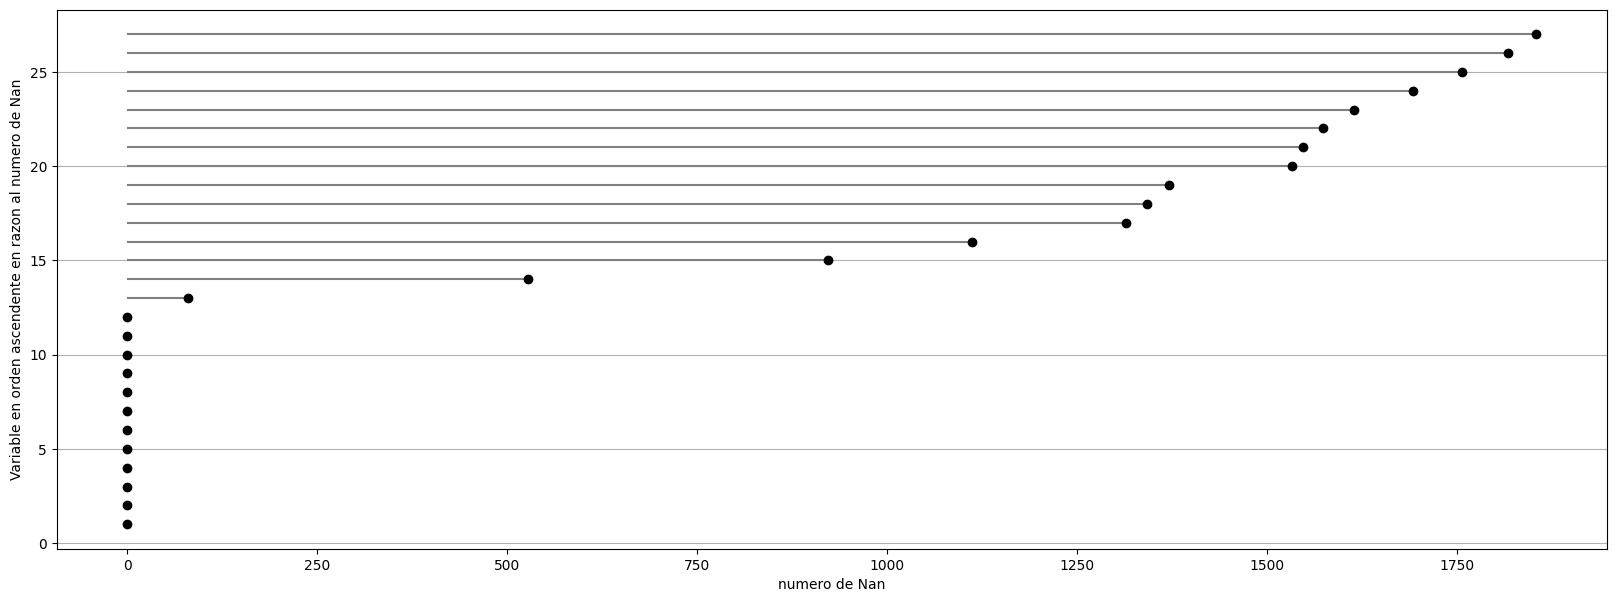

In [58]:
graf_num_nan(dfpropiedades)

# Cruce de la infromacion

A continuacion se uniran los datframes dfpropiedades con dfubiacion , con el fin de asignarle una ubcacion mas exacta a cada vivenda

Como referencia para los dos dataframes usaremos el nombre del municipio

In [61]:
# Definir una función para la limpieza de cada columna
def limpiar_columna(columna):
    columna = columna.lower().strip()
    columna = re.sub(r'[^\w\s]', '', columna)  # Quitar caracteres especiales
    columna = re.sub(r'\s+', '_', columna)  # Reemplazar espacios por guiones bajos
    columna = unidecode.unidecode(columna)  # Quitar acentos y diacríticos
    return columna

# Aplicar la limpieza a todas las columnas
columnas_nuevas = {columna: limpiar_columna(columna) for columna in dfpropiedades.columns}

El estudio se centrara en los municipios del oriente antioqueño, por tal motivo filtraremos los valores del dataframe dfubiacion para Antioquia solamente

In [62]:
dfubicacion=dfubicacion[dfubicacion["Nombre Departamento"]=='ANTIOQUIA']


In [63]:
dfubicacion["Nombre Municipio"] = dfubicacion["Nombre Municipio"].str.lower().apply(unidecode.unidecode)


In [64]:
list_muni = dfubicacion["Nombre Municipio"].tolist() + ['ceja', 'viboral', 'llano', 'llanogrande', 'pereira', 'union', 'unión', 'santuario']

In [67]:
def extract_ubicacion(lineas):
    '''
    Esta fucion extrae la ubicacion de la propiedad a partir de los datos del dataframe
    '''
    texto = lineas[0].lower().replace(',', '').replace(';', '').split()
    for palabra in texto:
        if palabra in list_muni:
            return palabra
    
    if len(lineas) > 1:
        texto = lineas[1].lower().replace(',', '').replace(';', '').split()
        for palabra in texto:
            if palabra in list_muni:
                return palabra
            
    return ''


In [68]:
tipo_propiedades=['casa','finca','apartamento','apartaestudio','lote', 'apartamentos']

def extract_tipo(lineas):
    texto = lineas[0].lower().split()
    for palabra in texto:
        if palabra in tipo_propiedades:
            return palabra
    
    if len(lineas) > 1:
        texto = lineas[1].lower().split()
        for palabra in texto:
            if palabra in tipo_propiedades:
                return palabra
    
    return 'apartamento'


In [70]:
dfpropiedades["municipio"]=dfpropiedades[["titulo","descripcion"]].apply(extract_ubicacion,axis=1)
dfpropiedades["tipo_propiedad"]=dfpropiedades[["titulo","descripcion"]].apply(extract_tipo, axis=1)

In [72]:
dfpropiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo                           2715 non-null   object 
 1   url                            2715 non-null   object 
 2   titulo                         2715 non-null   object 
 3   precio                         2715 non-null   object 
 4   area                           2715 non-null   object 
 5   habitaciones                   2715 non-null   object 
 6   banos                          2715 non-null   object 
 7   garajes                        2715 non-null   object 
 8   descripcion                    2715 non-null   object 
 9   Balcón                         1401 non-null   float64
 10  Trans. Público cercano         1604 non-null   float64
 11  caractint                      2715 non-null   object 
 12  caractext                      2715 non-null   o

Ya concluyo la union de la informacion y obetenemos en el dataset de propiedades los elementos del datased de ubicacion

# Arreglo de Variables

Se procedera a analizar las variables y determinar que transformaciones son necesarias con el fin de realizar un mejor analisis

In [73]:
#unificar apartamentos
dfpropiedades['tipo_propiedad'] = dfpropiedades['tipo_propiedad'].str.replace('apartamentos', 'apartamento')

In [75]:
def unifica_muni(texto):
    '''
    Esta funcion permite unificar el nombre de los municipios
    '''
    muni = {'retiro': 'el retiro',
            'ceja': 'la ceja',
            'viboral': 'el carmen de viboral',
            'llano': 'llanogrande',
            'unión': 'la unión',
            'pereira': 'san antonio de pereira'}
    
    return muni.get(texto, texto)


In [76]:
dfpropiedades['municipio']=dfpropiedades['municipio'].apply(unifica_muni)
dfpropiedades['municipio'].value_counts()

rionegro                  1360
el retiro                  474
la ceja                    368
guarne                     212
el carmen de viboral        93
marinilla                   90
llanogrande                 58
san antonio de pereira      43
santuario                   13
la unión                     4
Name: municipio, dtype: int64

# Busqueda de valores duplicados

In [78]:
dfpropiedades.duplicated().sum()

0

# Exportacion de datos

In [77]:
# dfpropiedades.to_csv('dfpropiedadesclean',index=False)